<a href="https://colab.research.google.com/github/rafaelvelloso81/IBMEC2023/blob/main/Projeto2_A%C3%A7%C3%B5es_AN%C3%81LISE_PREDITIVA_E_VANTAGEM_COMPETITIVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO APLICADO: ANÁLISE PREDITIVA E VANTAGEM COMPETITIVA**

**Professor:** Sergio Monteiro

**Aluno:** Rafael Velloso Peluso de Oliveira
**Matricula:** 202203602373

**Trabalho 2 (70%)** - Análise preditiva e otimização de escolha de ações


**Curso:** MBA em BI & Data Science Campus e Turno: Barra/Noite

Instalação de Componentes

In [2]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 KB 4.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.13
    Uninstalling yfinance-0.2.13:
      Successfully uninstalled yfinance-0.2.13


In [3]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Variavéis de Seleção de Ações

In [6]:
acao0 = "PETR4.SA"
acao1 = "CMIG4.SA"
acao2 = "BBAS3.SA"
acao3 = "ITSA4.SA"
acao4 = "MULT3.SA"
acao5 = "CCRO3.SA"
acao6 = "BRKM5.SA"
acao7 = "OIBR4.SA"
acao8 = "JBSS3.SA"
acao9 = "USIM5.SA"     

Download das informações de fechamento das Ações Selecionadas

In [7]:
dados_acao = [acao0, acao1, acao2, acao3, acao4, acao5, acao6, acao7, acao8, acao9]
df = yf.download(dados_acao, start='2018-01-01', end='2023-02-28')[['Close']]
df.head()


[*********************100%***********************]  10 of 10 completed


Close                                                     \
             BBAS3.SA   BRKM5.SA   CCRO3.SA  CMIG4.SA  ITSA4.SA JBSS3.SA   
Date                                                                       
2018-01-02  32.930000  43.860001  16.559999  4.612089  8.681621    10.10   
2018-01-03  33.349998  43.490002  16.440001  4.572330  8.783943     9.88   
2018-01-04  33.669998  44.150002  16.500000  4.519317  8.949232     9.90   
2018-01-05  33.669998  45.220001  16.570000  4.525944  8.964974     9.98   
2018-01-08  33.750000  45.299999  16.340000  4.539197  8.957103    10.00   

                                                      
             MULT3.SA   OIBR4.SA   PETR4.SA USIM5.SA  
Date                                                  
2018-01-02  24.083332  34.200001  16.549999     9.60  
2018-01-03  24.180000  34.200001  16.700001     9.92  
2018-01-04  24.153334  34.200001  16.730000    10.48  
2018-01-05  24.330000  34.400002  16.830000    10.03  
2018-01-08  24.026667  34.299999  17.030001    10.14

Transformação em Lista

In [8]:

lista_acoes = []

for acao in dados_acao:
  lista_acoes.append({
      'acao': acao,
      'valor': df['Close'][acao].values.tolist()
  })

In [9]:
print(lista_acoes)

[{'acao': 'PETR4.SA', 'valor': [16.549999237060547, 16.700000762939453, 16.729999542236328, 16.829999923706055, 17.030000686645508, 17.030000686645508, 16.799999237060547, 17.25, 17.299999237060547, 17.350000381469727, 17.649999618530273, 18.360000610351562, 18.219999313354492, 18.260000228881836, 18.469999313354492, 18.239999771118164, 19.34000015258789, 19.34000015258789, 19.93000030517578, 19.850000381469727, 19.489999771118164, 19.700000762939453, 20.520000457763672, 19.969999313354492, 19.040000915527344, 19.989999771118164, 19.440000534057617, 19.049999237060547, 18.770000457763672, 19.25, 19.399999618530273, 19.420000076293945, 20.049999237060547, 20.440000534057617, 20.25, 20.739999771118164, 21.1200008392334, 21.520000457763672, 21.5, 21.459999084472656, 21.030000686645508, 21.510000228881836, 22.1200008392334, 21.899999618530273, 21.670000076293945, 21.700000762939453, 22.389999389648438, 22.329999923706055, 22.110000610351562, 22.3799991607666, 21.309999465942383, 21.4300003

Normalizando os Valores

In [10]:
x = np.arange (1,len(lista_acoes[0]['valor'])+1,1)

for pad in lista_acoes:
  min = np.min(pad['valor'])
  max = np.max(pad['valor'])
  pad['valor'] = (pad['valor'] - min)/(max - min)
  

In [11]:
print(lista_acoes)

[{'acao': 'PETR4.SA', 'valor': array([0.19901623, 0.20469166, 0.20582669, ..., 0.57737414, 0.55278089,
       0.56223984])}, {'acao': 'CMIG4.SA', 'valor': array([0.03193079, 0.02736928, 0.02128719, ..., 0.72924058, 0.71317865,
       0.71317865])}, {'acao': 'BBAS3.SA', 'valor': array([0.32677763, 0.3394856 , 0.34916789, ..., 0.60423596, 0.55521936,
       0.53857793])}, {'acao': 'ITSA4.SA', 'valor': array([0.36616894, 0.38349776, 0.41149024, ..., 0.34557197, 0.30492669,
       0.2930719 ])}, {'acao': 'MULT3.SA', 'valor': array([0.4005939 , 0.40566037, 0.40426274, ..., 0.42767295, 0.42295596,
       0.4538784 ])}, {'acao': 'CCRO3.SA', 'valor': array([0.71147537, 0.70163939, 0.70655738, ..., 0.25737708, 0.25737708,
       0.25409832])}, {'acao': 'BRKM5.SA', 'valor': array([0.56222965, 0.55607326, 0.56705495, ..., 0.16738768, 0.16306159,
       0.16289519])}, {'acao': 'OIBR4.SA', 'valor': array([0.8618021 , 0.8618021 , 0.8618021 , ..., 0.02515202, 0.02598121,
       0.01851852])}, {'acao'

Organização do modelo de dados

In [12]:
teste = {}
treino = {}


for pad in lista_acoes:
  percentual_treinamento = 0.8
  qtd_treinamento = int(percentual_treinamento*(len(x)));

  treino_x = x[0:qtd_treinamento] 
  teste_x = x[qtd_treinamento:]

  treino_y = pad['valor'][0:qtd_treinamento]
  teste_y= pad['valor'][qtd_treinamento:]


  treino[pad['acao']]= np.array(list(zip(treino_x, treino_y)))
  teste[pad['acao']]= np.array(list(zip(teste_x, teste_y)))

In [13]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [14]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

Estruturação dos dados

In [15]:
x_treino = {}
x_teste = {}
y_treino = {}
y_teste = {}


for acao in dados_acao:
  look_back = 2
  local_treino_x, y_treino[acao] = preparar_dados(treino[acao], look_back)
  local_teste_x, y_teste[acao] = preparar_dados(teste[acao], look_back)

  n_caracteristicas = 1 #série monovariada
  x_treino[acao] = local_treino_x.reshape((local_treino_x.shape[0], 
                              local_treino_x.shape[1], 
                              n_caracteristicas))
  x_teste[acao] = local_teste_x.reshape((local_teste_x.shape[0], 
                        local_teste_x.shape[1], 
                        n_caracteristicas))


**Criação do Modelo de Redes Neurais**

In [16]:
modelo = {}

for acao in dados_acao:
  n_etapas = x_treino[acao].shape[1]
  n_caracteristicas = x_treino[acao].shape[2]
  epocas = 20
  n_unidades  = 100
  tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
  modelo[acao] = Sequential()
  input_layer=(n_etapas, n_caracteristicas)
  modelo[acao].add(LSTM(n_unidades, 
                return_sequences = True, 
                input_shape = input_layer))
  modelo[acao].add(Dropout(0.2))
  modelo[acao].add(LSTM(128,
                input_shape = input_layer))
  modelo[acao].add(Dense(1))


In [17]:
for acao in dados_acao:
  print(acao)
  print(modelo[acao].summary())

PETR4.SA
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 2, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________
None
CMIG4.SA
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm

**Escolha de Hiperparâmetros**

In [18]:
for acao in dados_acao:
  modelo[acao].compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [19]:
historico = {}

for acao in dados_acao:
  historico[acao] = modelo[acao].fit(x_treino[acao], y_treino[acao],
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

  hist = pd.DataFrame(historico[acao].history)
  hist.head()

In [20]:
for acao in dados_acao:
  print(f'\n{acao}')
  modelo[acao].evaluate(x_teste[acao], y_teste[acao], batch_size=64)


PETR4.SA
4/4 [==============================] - 0s 6ms/step - loss: 0.0020

CMIG4.SA
4/4 [==============================] - 0s 5ms/step - loss: 0.0014

BBAS3.SA
4/4 [==============================] - 0s 5ms/step - loss: 0.0013

ITSA4.SA
4/4 [==============================] - 0s 5ms/step - loss: 9.0593e-04

MULT3.SA
4/4 [==============================] - 0s 6ms/step - loss: 0.0012

CCRO3.SA
4/4 [==============================] - 0s 7ms/step - loss: 7.3582e-04

BRKM5.SA
4/4 [==============================] - 0s 6ms/step - loss: 0.0012

OIBR4.SA
4/4 [==============================] - 0s 5ms/step - loss: 0.0011

JBSS3.SA
4/4 [==============================] - 0s 6ms/step - loss: 0.0029

USIM5.SA
4/4 [==============================] - 0s 6ms/step - loss: 3.3899e-04


**Predição do Modelo**

In [21]:
predicao = {}

for acao in dados_acao:
  predicao[acao] = modelo[acao].predict(x_teste[acao])

8/8 [==============================] - 1s 3ms/step


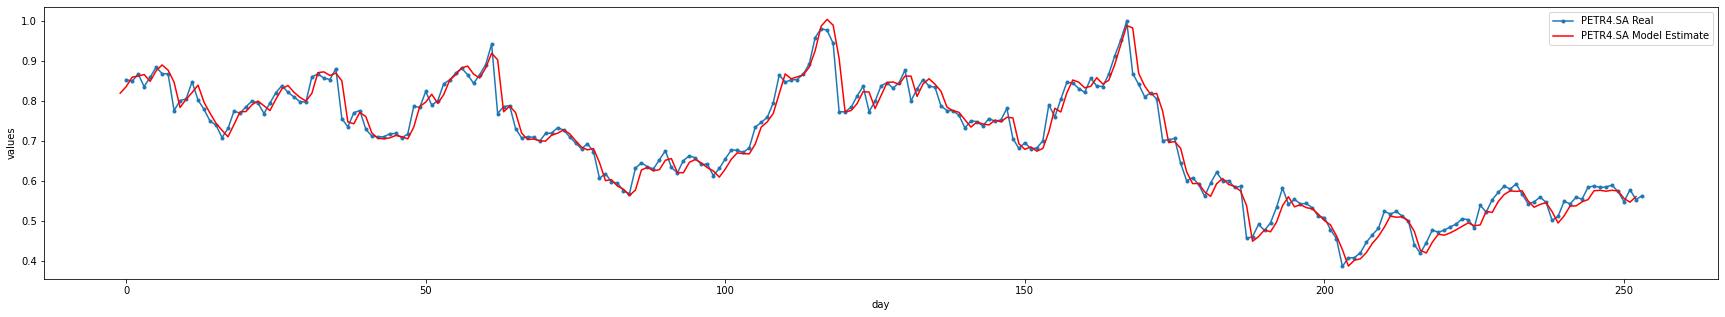

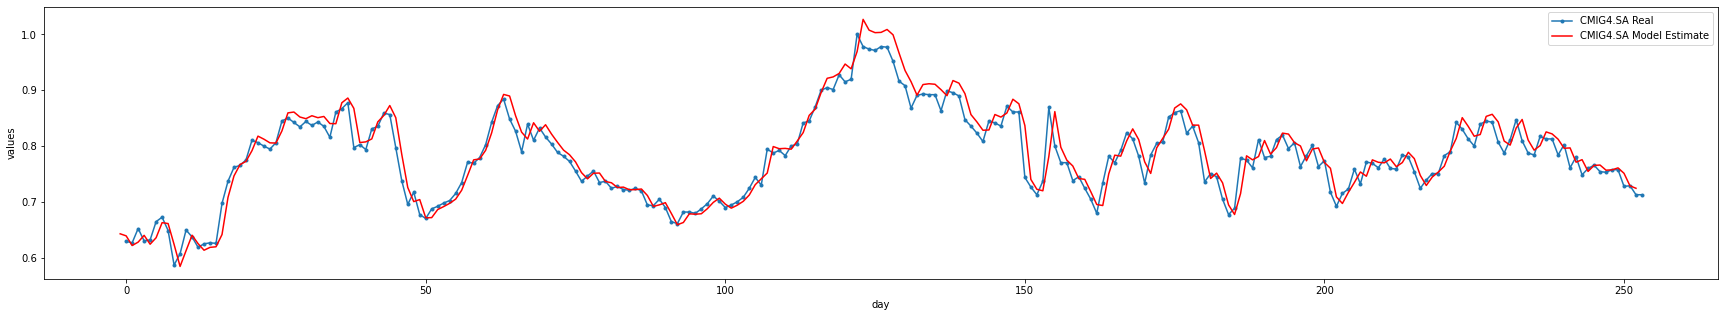

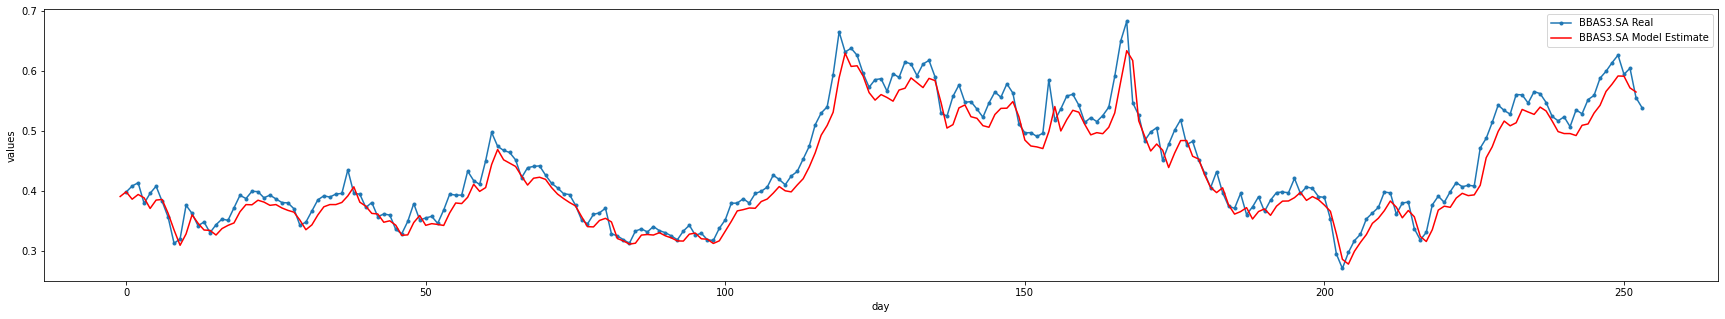

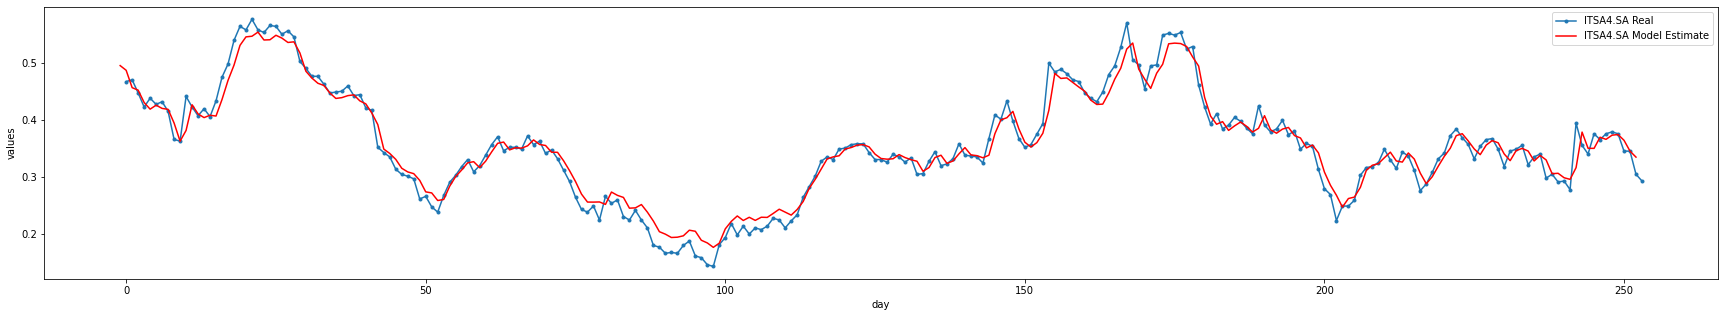

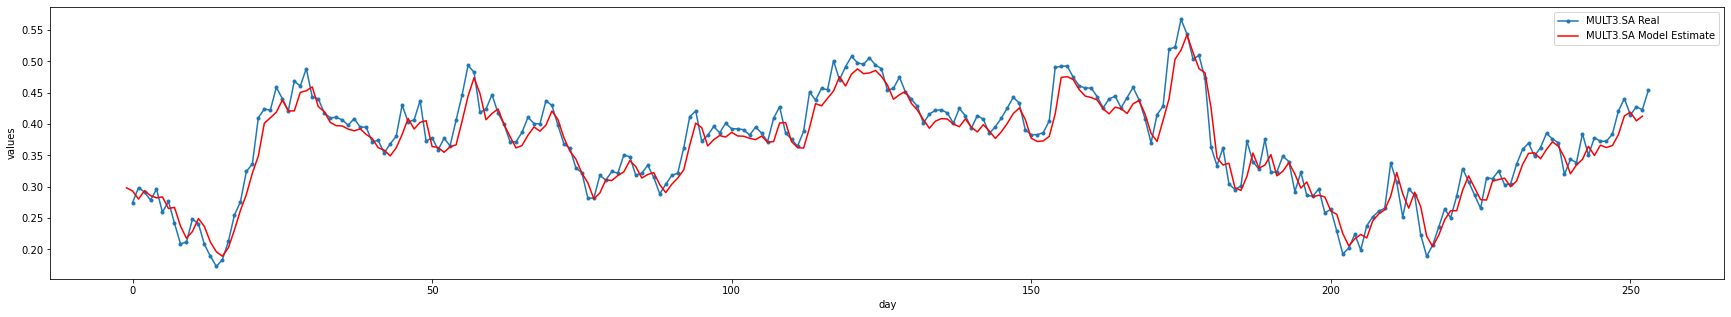

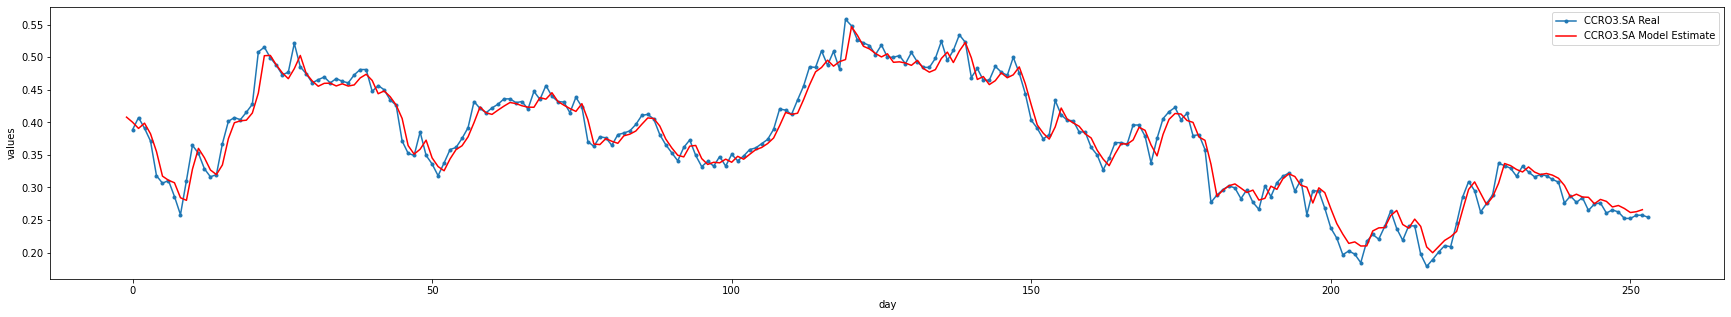

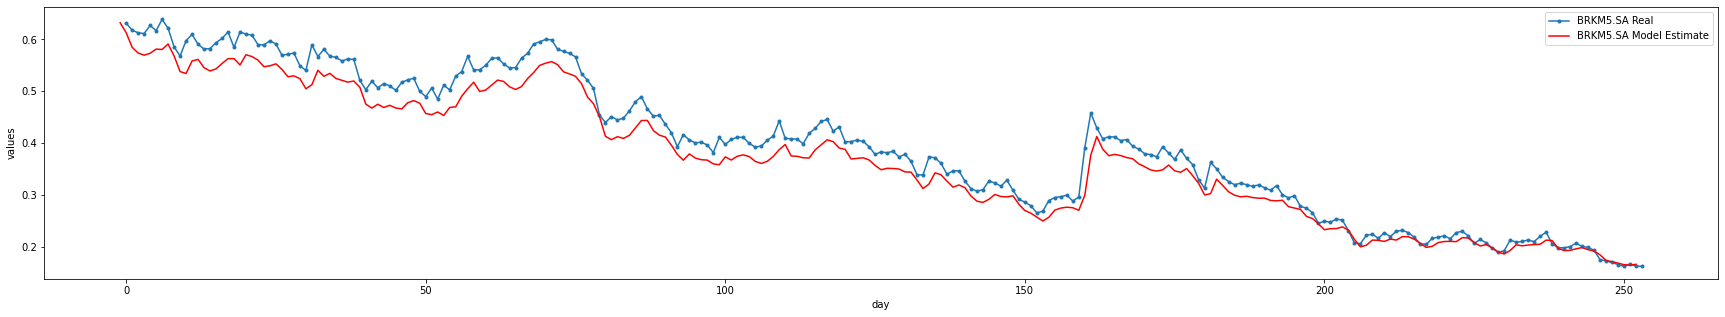

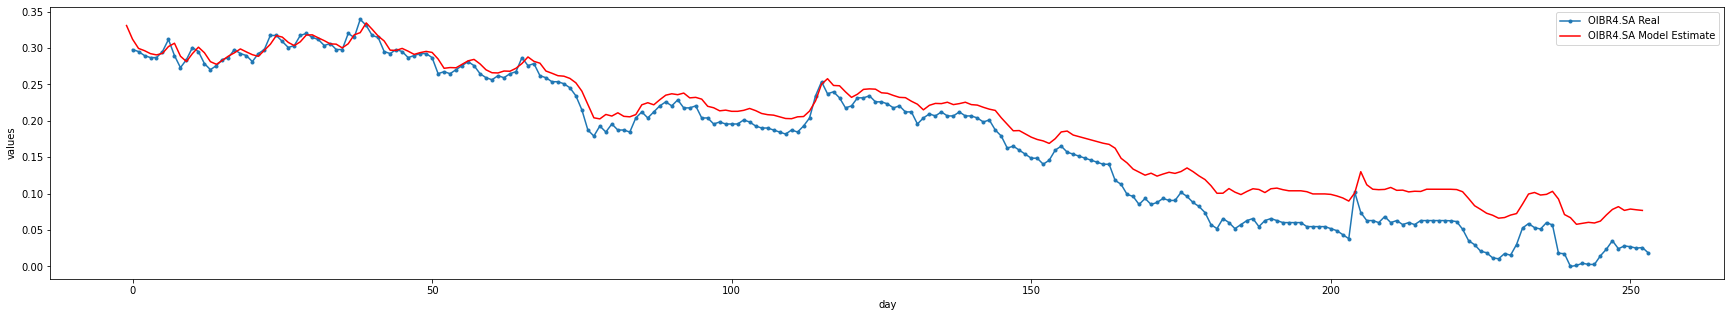

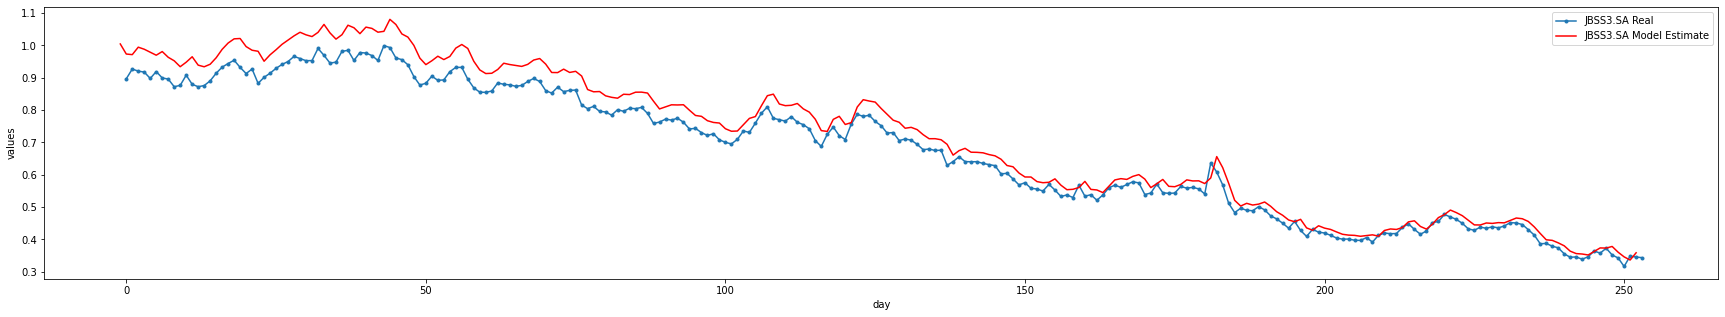

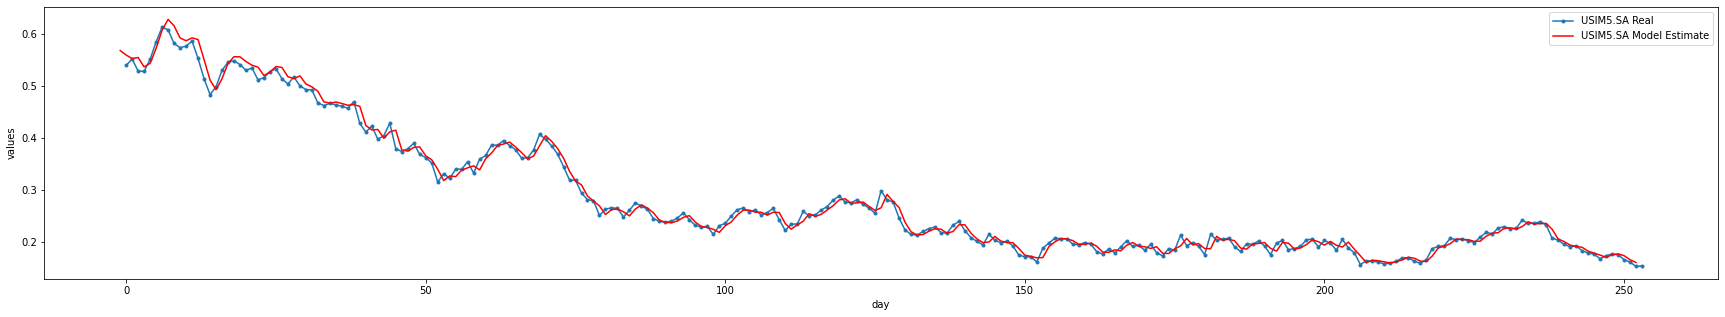

In [22]:
reais_y = {}
dados_predicao = {}

for acao in dados_acao:
  look_back = 1
  reais_y[acao] = y_teste[acao]
  plt.figure(figsize=(30,5))
  plt.plot(list(range(len(reais_y[acao]))), 
          reais_y[acao], 
          marker='.', 
          label=f'{acao} Real')
  dados_predicao[acao] = [w[0] for w in predicao[acao]]
  plt.plot(list(np.arange(len(predicao[acao]))-look_back), 
          dados_predicao[acao], 
          'r',label=f'{acao} Model Estimate')
  plt.ylabel('values', size=10)
  plt.xlabel('day', size=10)
  plt.legend(fontsize=10)
  plt.show()

**Mochila**

Adicionando Compnente

In [23]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 87.5 MB/s eta 0:00:00


In [24]:
from mip import Model, maximize, xsum, BINARY, OptimizationStatus

In [25]:
ganho = {}

for acao in dados_acao:
  print('\n')
  la_manama = modelo[acao].predict([x_teste[acao][-1]])
  ganho[acao] = (la_manama[1][0] - x_teste[acao][-1][1][0]) / la_manama[1][0]



1/1 [==============================] - 1s 728ms/step




1/1 [==============================] - 1s 622ms/step




1/1 [==============================] - 1s 717ms/step


1/1 [==============================] - 1s 616ms/step


1/1 [==============================] - 1s 651ms/step




1/1 [==============================] - 1s 623ms/step




1/1 [==============================] - 1s 1s/step




1/1 [==============================] - 1s 944ms/step




1/1 [==============================] - 1s 1s/step




1/1 [==============================] - 1s 1s/step


In [27]:
obj_coef = list(ganho.values())
rest_coef = [1] * 10
ind = 3

In [28]:
tamanho = range(len(obj_coef))
modelo1 = Model('Mochila')
mip_vars = [modelo1.add_var(var_type=BINARY) for i in tamanho]

In [30]:
funcao = xsum(obj_coef[i] * mip_vars[i] for i in tamanho)
modelo1.objective = maximize(funcao)

In [31]:
modelo1 += xsum(rest_coef[i] * mip_vars[i] for i in tamanho) <= ind

In [32]:
status = modelo1.optimize(max_seconds=60)

In [33]:
status == OptimizationStatus.OPTIMAL

True

In [34]:
selected = [list(ganho.keys())[i] for i in tamanho if mip_vars[i].x >= 0.99]
print(f'Itens Selecionados: {selected}')
print(f'Optimal return: {modelo1.objective_value}')

Itens Selecionados: ['OIBR4.SA']
Optimal return: 0.4866571179846719
